Using device: cpu

=== 訓練模型：No_BatchNorm ===
Epoch 1/10 | Train loss: 2.1135 acc: 0.1875 | Test loss: 1.9232 acc: 0.2318
Epoch 2/10 | Train loss: 1.7893 acc: 0.3145 | Test loss: 1.6724 acc: 0.3385
Epoch 3/10 | Train loss: 1.6087 acc: 0.3493 | Test loss: 1.5579 acc: 0.3597
Epoch 4/10 | Train loss: 1.4957 acc: 0.3976 | Test loss: 1.4547 acc: 0.4375
Epoch 5/10 | Train loss: 1.3523 acc: 0.4976 | Test loss: 1.2467 acc: 0.5664
Epoch 6/10 | Train loss: 1.1515 acc: 0.6118 | Test loss: 1.0549 acc: 0.6587
Epoch 7/10 | Train loss: 1.0143 acc: 0.6656 | Test loss: 0.9483 acc: 0.6961
Epoch 8/10 | Train loss: 0.9186 acc: 0.7063 | Test loss: 0.8647 acc: 0.7285
Epoch 9/10 | Train loss: 0.8278 acc: 0.7409 | Test loss: 0.8146 acc: 0.7494
Epoch 10/10 | Train loss: 0.7805 acc: 0.7631 | Test loss: 0.7680 acc: 0.7726

=== 訓練模型：With_BatchNorm ===
Epoch 1/10 | Train loss: 1.7639 acc: 0.3447 | Test loss: 1.3968 acc: 0.4564
Epoch 2/10 | Train loss: 1.2876 acc: 0.4768 | Test loss: 1.1993 acc: 0.4896
Epoch 3/10 | 

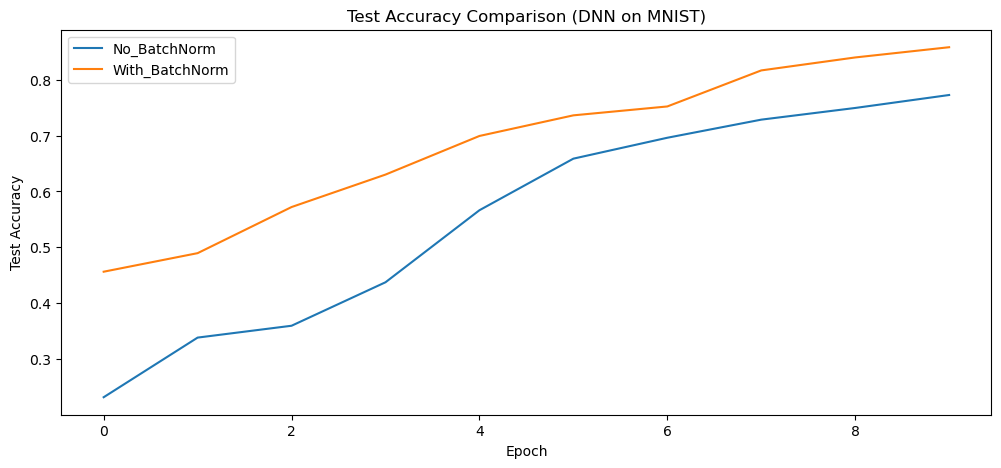

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# ==== 1. 超參數設定 ====
batch_size = 128
epochs = 10
lr = 0.001
device = torch.device("cpu")

print("Using device:", device)

# ==== 2. 數據預處理與載入 ====
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)), # MNIST 標準化
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ==== 3. 定義 3層 DNN ====



class DNN(nn.Module):
    def __init__(self, use_bn=False):
        super().__init__()
        layers = []
        input_dim = 28*28
        hidden_units = 6    # 每層神經元數減少
        num_layers = 10       # 層數增加
        for i in range(num_layers):
            layers.append(nn.Linear(input_dim, hidden_units))
            if use_bn:
                layers.append(nn.BatchNorm1d(hidden_units))
            layers.append(nn.ReLU())
            input_dim = hidden_units
        layers.append(nn.Linear(hidden_units, 10))
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.net(x)



# ==== 4. 訓練與測試函數 ====

def train(model, loader, optimizer, criterion):
    model.train()
    running_loss, correct, total = 0, 0, 0
    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    return running_loss/total, correct/total

def evaluate(model, loader, criterion):
    model.eval()
    running_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return running_loss/total, correct/total

# ==== 5. 執行訓練與比較 ====

results = {}
for use_bn in [False, True]:
    label = 'With_BatchNorm' if use_bn else 'No_BatchNorm'
    print(f"\n=== 訓練模型：{label} ===")
    model = DNN(use_bn=use_bn).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    train_losses, train_accs, test_losses, test_accs = [], [], [], []
    for epoch in range(epochs):
        loss, acc = train(model, train_loader, optimizer, criterion)
        test_loss, test_acc = evaluate(model, test_loader, criterion)
        train_losses.append(loss)
        train_accs.append(acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)
        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train loss: {loss:.4f} acc: {acc:.4f} | "
              f"Test loss: {test_loss:.4f} acc: {test_acc:.4f}")
    results[label] = {
        'train_loss': train_losses, 'train_acc': train_accs,
        'test_loss': test_losses, 'test_acc': test_accs
    }

# ==== 6. 畫圖比較訓練過程 ====
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
for label in results:
    plt.plot(results[label]['test_acc'], label=label)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison (DNN on MNIST)')
plt.legend()
plt.show()

Using device: cpu

=== 訓練模型：No_BatchNorm ===
Epoch 1/10 | Train loss: 2.3162 acc: 0.0984 | Test loss: 2.3049 acc: 0.1028
Epoch 2/10 | Train loss: 2.3025 acc: 0.1059 | Test loss: 2.3012 acc: 0.1135
Epoch 3/10 | Train loss: 2.3013 acc: 0.1124 | Test loss: 2.3011 acc: 0.1135
Epoch 4/10 | Train loss: 2.3013 acc: 0.1124 | Test loss: 2.3010 acc: 0.1135
Epoch 5/10 | Train loss: 2.3013 acc: 0.1124 | Test loss: 2.3011 acc: 0.1135
Epoch 6/10 | Train loss: 2.3013 acc: 0.1124 | Test loss: 2.3010 acc: 0.1135
Epoch 7/10 | Train loss: 2.3013 acc: 0.1124 | Test loss: 2.3010 acc: 0.1135
Epoch 8/10 | Train loss: 2.3013 acc: 0.1124 | Test loss: 2.3011 acc: 0.1135
Epoch 9/10 | Train loss: 2.3013 acc: 0.1124 | Test loss: 2.3011 acc: 0.1135
Epoch 10/10 | Train loss: 2.3013 acc: 0.1124 | Test loss: 2.3010 acc: 0.1135

=== 訓練模型：With_BatchNorm ===
Epoch 1/10 | Train loss: 2.0719 acc: 0.2403 | Test loss: 1.9477 acc: 0.2931
Epoch 2/10 | Train loss: 1.8789 acc: 0.2952 | Test loss: 1.7944 acc: 0.3165
Epoch 3/10 | 

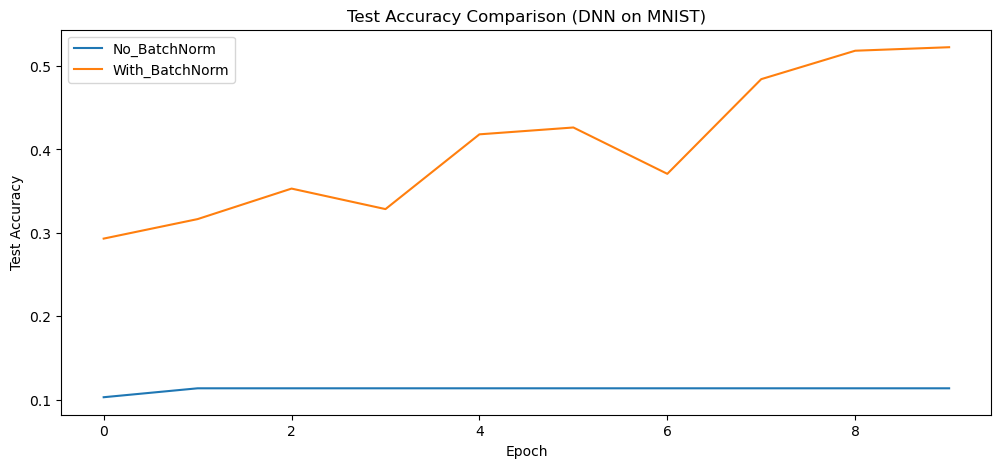

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# ==== 1. 超參數設定 ====
batch_size = 128
epochs = 10
lr = 0.001
device = torch.device("cpu")

print("Using device:", device)

# ==== 2. 數據預處理與載入 ====
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)), # MNIST 標準化
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ==== 3. 定義 3層 DNN ====



class DNN(nn.Module):
    def __init__(self, use_bn=False):
        super().__init__()
        layers = []
        input_dim = 28*28
        hidden_units = 4    # 每層神經元數減少
        num_layers = 15       # 層數增加
        for i in range(num_layers):
            layers.append(nn.Linear(input_dim, hidden_units))
            if use_bn:
                layers.append(nn.BatchNorm1d(hidden_units))
            layers.append(nn.ReLU())
            input_dim = hidden_units
        layers.append(nn.Linear(hidden_units, 10))
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.net(x)



# ==== 4. 訓練與測試函數 ====

def train(model, loader, optimizer, criterion):
    model.train()
    running_loss, correct, total = 0, 0, 0
    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    return running_loss/total, correct/total

def evaluate(model, loader, criterion):
    model.eval()
    running_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return running_loss/total, correct/total

# ==== 5. 執行訓練與比較 ====

results = {}
for use_bn in [False, True]:
    label = 'With_BatchNorm' if use_bn else 'No_BatchNorm'
    print(f"\n=== 訓練模型：{label} ===")
    model = DNN(use_bn=use_bn).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    train_losses, train_accs, test_losses, test_accs = [], [], [], []
    for epoch in range(epochs):
        loss, acc = train(model, train_loader, optimizer, criterion)
        test_loss, test_acc = evaluate(model, test_loader, criterion)
        train_losses.append(loss)
        train_accs.append(acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)
        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train loss: {loss:.4f} acc: {acc:.4f} | "
              f"Test loss: {test_loss:.4f} acc: {test_acc:.4f}")
    results[label] = {
        'train_loss': train_losses, 'train_acc': train_accs,
        'test_loss': test_losses, 'test_acc': test_accs
    }

# ==== 6. 畫圖比較訓練過程 ====
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
for label in results:
    plt.plot(results[label]['test_acc'], label=label)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison (DNN on MNIST)')
plt.legend()
plt.show()

底下兩個程式：
1. cpu: 1m 17.1s
2. mps: 3m 53.8s

Using device: cpu

=== 訓練模型：No_BatchNorm ===
Epoch 1/10 | Train loss: 2.3089 acc: 0.1065 | Test loss: 2.3018 acc: 0.1135
Epoch 2/10 | Train loss: 2.3014 acc: 0.1124 | Test loss: 2.3011 acc: 0.1135
Epoch 3/10 | Train loss: 2.3013 acc: 0.1124 | Test loss: 2.3011 acc: 0.1135
Epoch 4/10 | Train loss: 2.3013 acc: 0.1124 | Test loss: 2.3010 acc: 0.1135
Epoch 5/10 | Train loss: 2.3013 acc: 0.1124 | Test loss: 2.3010 acc: 0.1135
Epoch 6/10 | Train loss: 2.3013 acc: 0.1124 | Test loss: 2.3011 acc: 0.1135
Epoch 7/10 | Train loss: 2.3013 acc: 0.1124 | Test loss: 2.3012 acc: 0.1135
Epoch 8/10 | Train loss: 2.3013 acc: 0.1124 | Test loss: 2.3010 acc: 0.1135
Epoch 9/10 | Train loss: 2.3013 acc: 0.1124 | Test loss: 2.3010 acc: 0.1135
Epoch 10/10 | Train loss: 2.3013 acc: 0.1124 | Test loss: 2.3012 acc: 0.1135

=== 訓練模型：With_BatchNorm ===
Epoch 1/10 | Train loss: 2.3072 acc: 0.1178 | Test loss: 2.2649 acc: 0.1597
Epoch 2/10 | Train loss: 2.1942 acc: 0.1938 | Test loss: 2.1073 acc: 0.2077
Epoch 3/10 | 

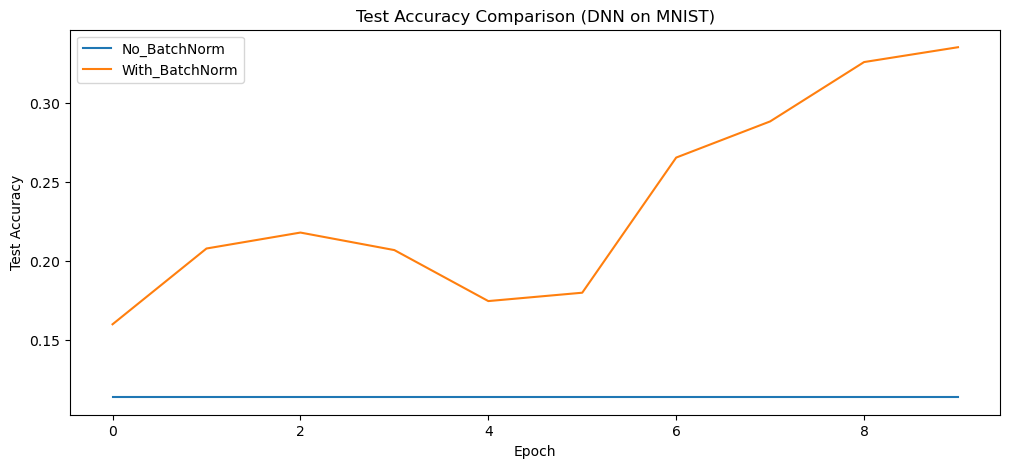

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# ==== 1. 超參數設定 ====
batch_size = 128
epochs = 10
lr = 0.001
device = torch.device("cpu")

print("Using device:", device)

# ==== 2. 數據預處理與載入 ====
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)), # MNIST 標準化
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ==== 3. 定義 3層 DNN ====



class DNN(nn.Module):
    def __init__(self, use_bn=False):
        super().__init__()
        layers = []
        input_dim = 28*28
        hidden_units = 4    # 每層神經元數減少
        num_layers = 20       # 層數增加
        for i in range(num_layers):
            layers.append(nn.Linear(input_dim, hidden_units))
            if use_bn:
                layers.append(nn.BatchNorm1d(hidden_units))
            layers.append(nn.ReLU())
            input_dim = hidden_units
        layers.append(nn.Linear(hidden_units, 10))
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.net(x)



# ==== 4. 訓練與測試函數 ====

def train(model, loader, optimizer, criterion):
    model.train()
    running_loss, correct, total = 0, 0, 0
    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    return running_loss/total, correct/total

def evaluate(model, loader, criterion):
    model.eval()
    running_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return running_loss/total, correct/total

# ==== 5. 執行訓練與比較 ====

results = {}
for use_bn in [False, True]:
    label = 'With_BatchNorm' if use_bn else 'No_BatchNorm'
    print(f"\n=== 訓練模型：{label} ===")
    model = DNN(use_bn=use_bn).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    train_losses, train_accs, test_losses, test_accs = [], [], [], []
    for epoch in range(epochs):
        loss, acc = train(model, train_loader, optimizer, criterion)
        test_loss, test_acc = evaluate(model, test_loader, criterion)
        train_losses.append(loss)
        train_accs.append(acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)
        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train loss: {loss:.4f} acc: {acc:.4f} | "
              f"Test loss: {test_loss:.4f} acc: {test_acc:.4f}")
    results[label] = {
        'train_loss': train_losses, 'train_acc': train_accs,
        'test_loss': test_losses, 'test_acc': test_accs
    }

# ==== 6. 畫圖比較訓練過程 ====
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
for label in results:
    plt.plot(results[label]['test_acc'], label=label)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison (DNN on MNIST)')
plt.legend()
plt.show()

Using device: mps

=== 訓練模型：No_BatchNorm ===
Epoch 1/10 | Train loss: 2.3117 acc: 0.1043 | Test loss: 2.3012 acc: 0.1135
Epoch 2/10 | Train loss: 2.3014 acc: 0.1124 | Test loss: 2.3012 acc: 0.1135
Epoch 3/10 | Train loss: 2.3014 acc: 0.1124 | Test loss: 2.3012 acc: 0.1135
Epoch 4/10 | Train loss: 2.3014 acc: 0.1124 | Test loss: 2.3012 acc: 0.1135
Epoch 5/10 | Train loss: 2.3014 acc: 0.1124 | Test loss: 2.3013 acc: 0.1135
Epoch 6/10 | Train loss: 2.3014 acc: 0.1124 | Test loss: 2.3013 acc: 0.1135
Epoch 7/10 | Train loss: 2.3015 acc: 0.1120 | Test loss: 2.3011 acc: 0.1135
Epoch 8/10 | Train loss: 2.3014 acc: 0.1124 | Test loss: 2.3010 acc: 0.1135
Epoch 9/10 | Train loss: 2.3014 acc: 0.1124 | Test loss: 2.3013 acc: 0.1135
Epoch 10/10 | Train loss: 2.3014 acc: 0.1124 | Test loss: 2.3011 acc: 0.1135

=== 訓練模型：With_BatchNorm ===
Epoch 1/10 | Train loss: 2.2913 acc: 0.1331 | Test loss: 2.2387 acc: 0.1482
Epoch 2/10 | Train loss: 2.1695 acc: 0.1941 | Test loss: 2.1216 acc: 0.2012
Epoch 3/10 | 

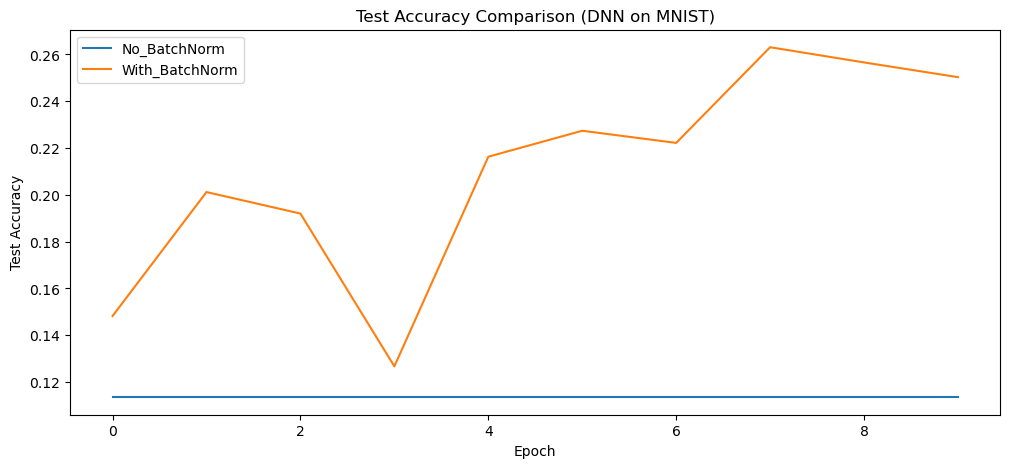

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# ==== 1. 超參數設定 ====
batch_size = 128
epochs = 10
lr = 0.001
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print("Using device:", device)

# ==== 2. 數據預處理與載入 ====
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)), # MNIST 標準化
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ==== 3. 定義 3層 DNN ====



class DNN(nn.Module):
    def __init__(self, use_bn=False):
        super().__init__()
        layers = []
        input_dim = 28*28
        hidden_units = 4    # 每層神經元數減少
        num_layers = 20       # 層數增加
        for i in range(num_layers):
            layers.append(nn.Linear(input_dim, hidden_units))
            if use_bn:
                layers.append(nn.BatchNorm1d(hidden_units))
            layers.append(nn.ReLU())
            input_dim = hidden_units
        layers.append(nn.Linear(hidden_units, 10))
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.net(x)



# ==== 4. 訓練與測試函數 ====

def train(model, loader, optimizer, criterion):
    model.train()
    running_loss, correct, total = 0, 0, 0
    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    return running_loss/total, correct/total

def evaluate(model, loader, criterion):
    model.eval()
    running_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return running_loss/total, correct/total

# ==== 5. 執行訓練與比較 ====

results = {}
for use_bn in [False, True]:
    label = 'With_BatchNorm' if use_bn else 'No_BatchNorm'
    print(f"\n=== 訓練模型：{label} ===")
    model = DNN(use_bn=use_bn).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    train_losses, train_accs, test_losses, test_accs = [], [], [], []
    for epoch in range(epochs):
        loss, acc = train(model, train_loader, optimizer, criterion)
        test_loss, test_acc = evaluate(model, test_loader, criterion)
        train_losses.append(loss)
        train_accs.append(acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)
        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train loss: {loss:.4f} acc: {acc:.4f} | "
              f"Test loss: {test_loss:.4f} acc: {test_acc:.4f}")
    results[label] = {
        'train_loss': train_losses, 'train_acc': train_accs,
        'test_loss': test_losses, 'test_acc': test_accs
    }

# ==== 6. 畫圖比較訓練過程 ====
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
for label in results:
    plt.plot(results[label]['test_acc'], label=label)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison (DNN on MNIST)')
plt.legend()
plt.show()

Using device: mps

=== 訓練模型：No_BatchNorm ===
Epoch 1/10 | Train loss: 1.7528 acc: 0.3064 | Test loss: 1.2633 acc: 0.5176
Epoch 2/10 | Train loss: 1.1297 acc: 0.6129 | Test loss: 0.9777 acc: 0.6789
Epoch 3/10 | Train loss: 0.9417 acc: 0.6891 | Test loss: 0.8681 acc: 0.6976
Epoch 4/10 | Train loss: 0.8445 acc: 0.7178 | Test loss: 0.7961 acc: 0.7346
Epoch 5/10 | Train loss: 0.7804 acc: 0.7372 | Test loss: 0.7457 acc: 0.7435
Epoch 6/10 | Train loss: 0.7441 acc: 0.7469 | Test loss: 0.7196 acc: 0.7564
Epoch 7/10 | Train loss: 0.7087 acc: 0.7581 | Test loss: 0.6842 acc: 0.7690
Epoch 8/10 | Train loss: 0.6725 acc: 0.7769 | Test loss: 0.6531 acc: 0.7889
Epoch 9/10 | Train loss: 0.6345 acc: 0.7960 | Test loss: 0.6161 acc: 0.8077
Epoch 10/10 | Train loss: 0.6066 acc: 0.8090 | Test loss: 0.5790 acc: 0.8260

=== 訓練模型：With_BatchNorm ===
Epoch 1/10 | Train loss: 1.4951 acc: 0.4729 | Test loss: 0.8982 acc: 0.6371
Epoch 2/10 | Train loss: 0.7851 acc: 0.7227 | Test loss: 0.5810 acc: 0.8553
Epoch 3/10 | 

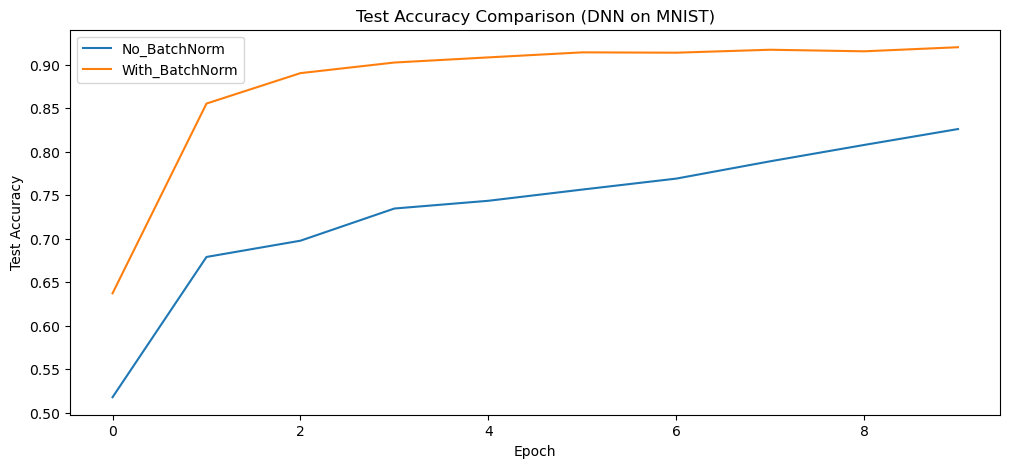

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# ==== 1. 超參數設定 ====
batch_size = 128
epochs = 10
lr = 0.001
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("Using device:", device)

# ==== 2. 數據預處理與載入 ====
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)), # MNIST 標準化
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ==== 3. 定義 3層 DNN ====



class DNN(nn.Module):
    def __init__(self, use_bn=False):
        super().__init__()
        layers = []
        input_dim = 28*28
        hidden_units = 8    # 每層神經元數減少
        num_layers = 8       # 層數增加
        for i in range(num_layers):
            layers.append(nn.Linear(input_dim, hidden_units))
            if use_bn:
                layers.append(nn.BatchNorm1d(hidden_units))
            layers.append(nn.ReLU())
            input_dim = hidden_units
        layers.append(nn.Linear(hidden_units, 10))
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.net(x)



# ==== 4. 訓練與測試函數 ====

def train(model, loader, optimizer, criterion):
    model.train()
    running_loss, correct, total = 0, 0, 0
    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    return running_loss/total, correct/total

def evaluate(model, loader, criterion):
    model.eval()
    running_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return running_loss/total, correct/total

# ==== 5. 執行訓練與比較 ====

results = {}
for use_bn in [False, True]:
    label = 'With_BatchNorm' if use_bn else 'No_BatchNorm'
    print(f"\n=== 訓練模型：{label} ===")
    model = DNN(use_bn=use_bn).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    train_losses, train_accs, test_losses, test_accs = [], [], [], []
    for epoch in range(epochs):
        loss, acc = train(model, train_loader, optimizer, criterion)
        test_loss, test_acc = evaluate(model, test_loader, criterion)
        train_losses.append(loss)
        train_accs.append(acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)
        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train loss: {loss:.4f} acc: {acc:.4f} | "
              f"Test loss: {test_loss:.4f} acc: {test_acc:.4f}")
    results[label] = {
        'train_loss': train_losses, 'train_acc': train_accs,
        'test_loss': test_losses, 'test_acc': test_accs
    }

# ==== 6. 畫圖比較訓練過程 ====
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
for label in results:
    plt.plot(results[label]['test_acc'], label=label)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison (DNN on MNIST)')
plt.legend()
plt.show()
